<a href="https://www.kaggle.com/code/mosesmoncy/wine-quality-predictor?scriptVersionId=126870603" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

There are four fundamental traits that comprise a good wine. They are Acidity, Tannin, Alcohol and Sweetness. For a wine to be considered “good,” each of these traits must be in proper proportion to each another. This is because each of these four fundamental traits play a vital role in how the wine tastes.

Model is created to predict the rating of wine using Regression Model(Random Forest Regressor).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
a=pd.read_csv('/kaggle/input/wine-quality-dataset/wines_SPA.csv')
a

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [3]:
# read first five data

a.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
# read last five data

a.tail()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
7499,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0


In [5]:
a.shape

(7500, 11)

In [6]:
a.describe

<bound method NDFrame.describe of                     winery             wine  year  rating  num_reviews  \
0            Teso La Monja            Tinto  2013     4.9           58   
1                   Artadi    Vina El Pison  2018     4.9           31   
2             Vega Sicilia            Unico  2009     4.8         1793   
3             Vega Sicilia            Unico  1999     4.8         1705   
4             Vega Sicilia            Unico  1996     4.8         1309   
...                    ...              ...   ...     ...          ...   
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

     country            region   price                  type  body  acidity  

In [7]:
a=a.replace('N.V.', 'NaN')

In [8]:
a['year']=pd.to_datetime(a['year'])

In [9]:
a['year']=a['year'].dt.year

In [10]:
a.dtypes

winery          object
wine            object
year           float64
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

In [11]:
a.isna().sum()

winery            0
wine              0
year            290
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [12]:
# there are missing values for 'year',acidity'&'body'
# hence filling the missing values with mean()

a['year']=a['year'].fillna(a['year'].mean())
a['acidity']=a['acidity'].fillna(a['acidity'].mean())
a['body']=a['body'].fillna(a['body'].mean())


In [13]:
a.isna().sum()

winery           0
wine             0
year             0
rating           0
num_reviews      0
country          0
region           0
price            0
type           545
body             0
acidity          0
dtype: int64

In [14]:
a['type'].value_counts()

Rioja Red               2357
Ribera Del Duero Red    1407
Red                      864
Priorat Red              674
Toro Red                 296
Tempranillo              291
Sherry                   274
Albarino                 252
Mencia                   235
Rioja White               92
Pedro Ximenez             35
Grenache                  35
Cava                      33
Verdejo                   27
Monastrell                18
Montsant Red              17
Syrah                     15
Chardonnay                13
Cabernet Sauvignon        11
Sparkling                  5
Sauvignon Blanc            4
Name: type, dtype: int64

In [15]:
a.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

In [16]:
a.dtypes

winery          object
wine            object
year           float64
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

<AxesSubplot:xlabel='acidity', ylabel='Count'>

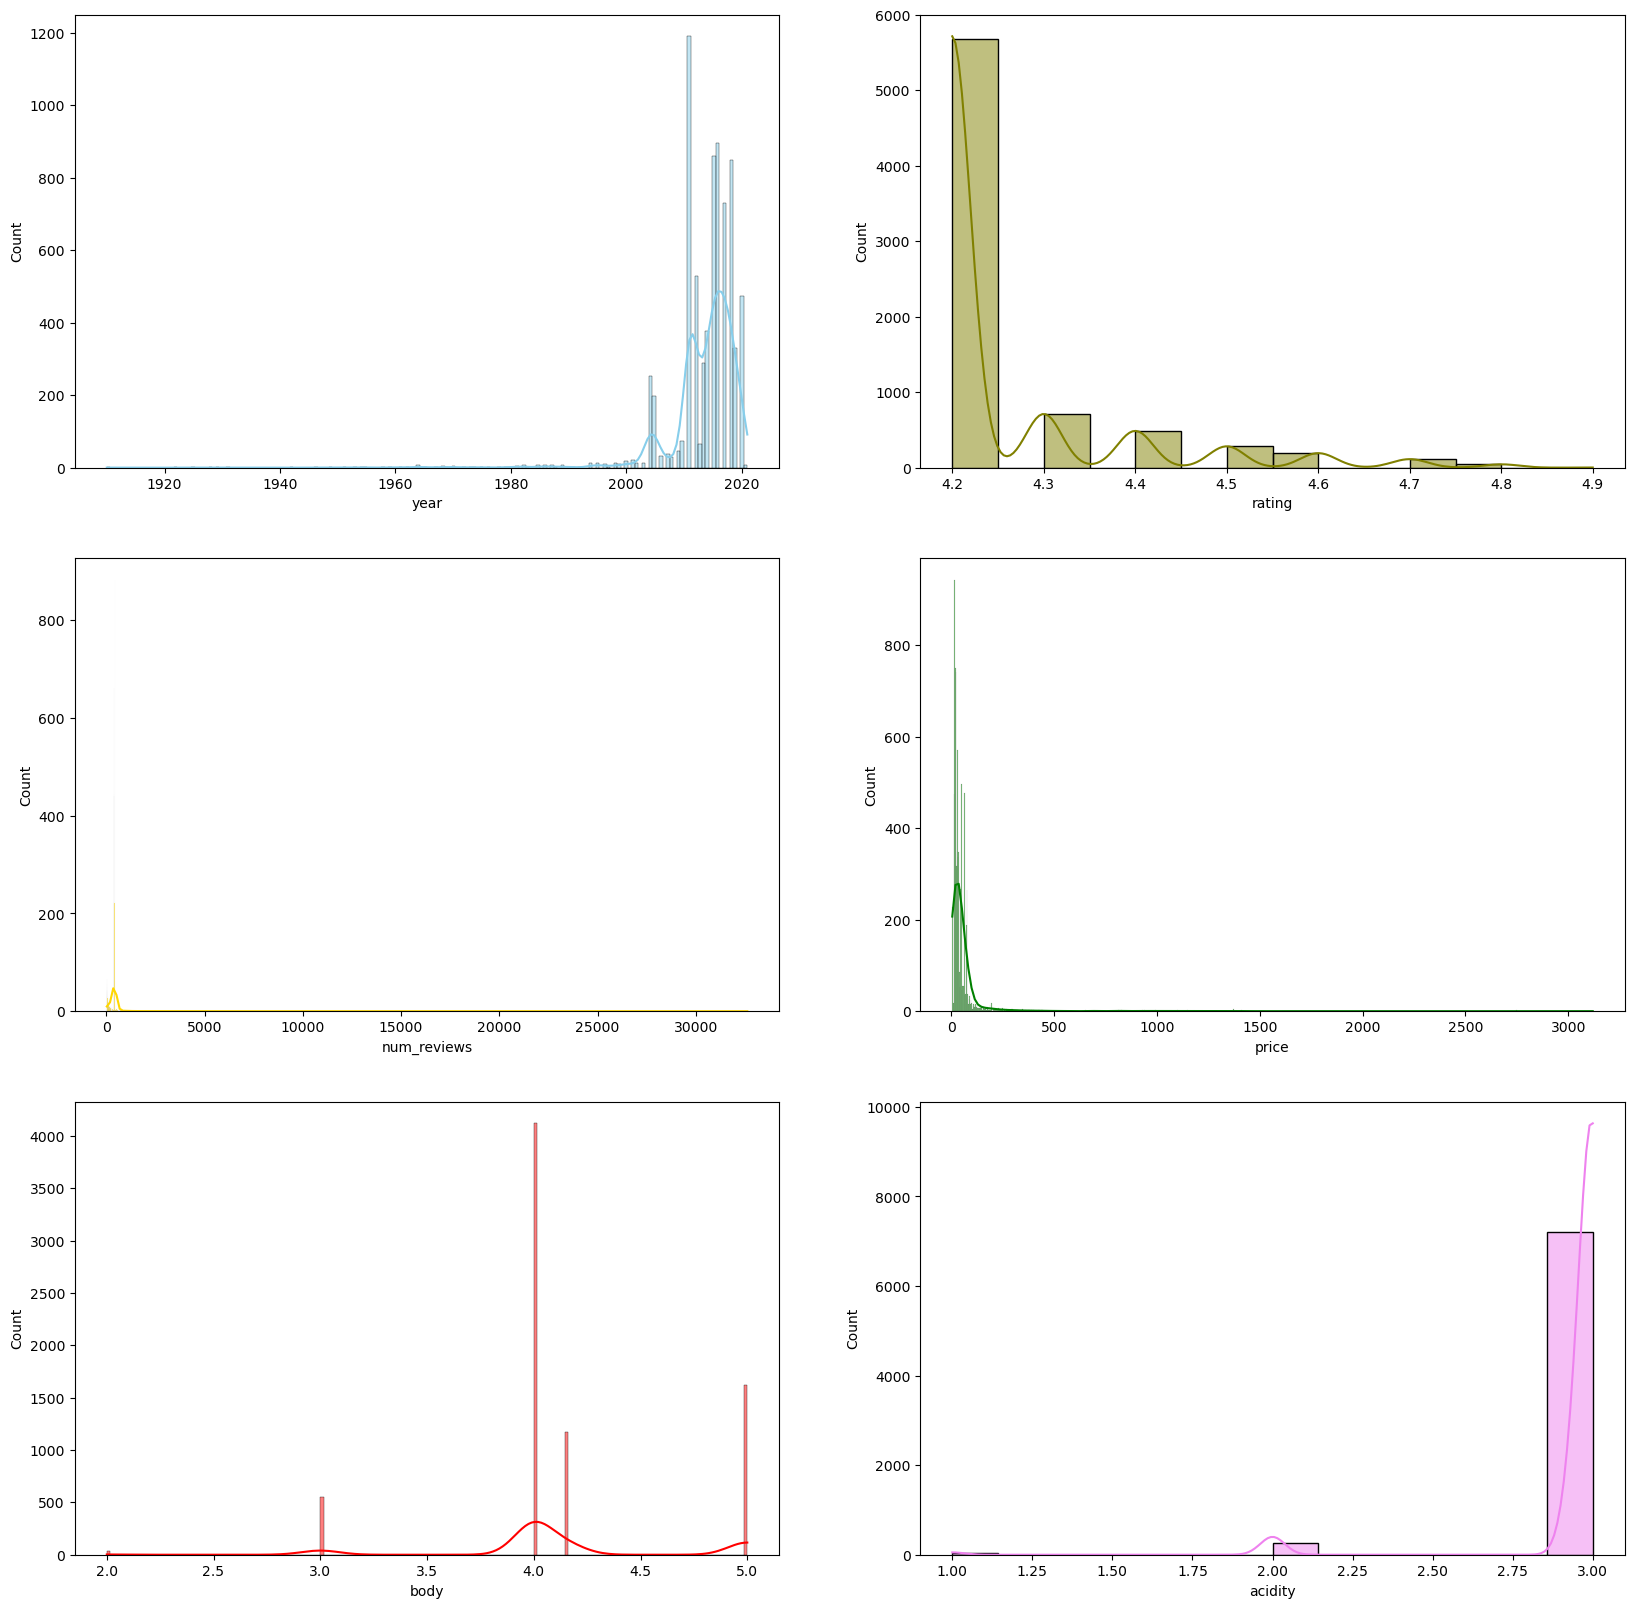

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
sns.histplot(data=a["year"], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a["rating"], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a["num_reviews"], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a["price"], kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=a["body"], kde=True, color="red", ax=axs[2, 0])
sns.histplot(data=a["acidity"], kde=True, color="violet", ax=axs[2, 1])


In [18]:
# using get_dummies encoding technique  

from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
cols=['winery','wine', 'country', 'region', 'type']

a[cols]=a[cols].apply(la.fit_transform)

In [19]:
a.dtypes

winery           int64
wine             int64
year           float64
rating         float64
num_reviews      int64
country          int64
region           int64
price          float64
type             int64
body           float64
acidity        float64
dtype: object

In [20]:
a.isna().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

<AxesSubplot:ylabel='rating'>

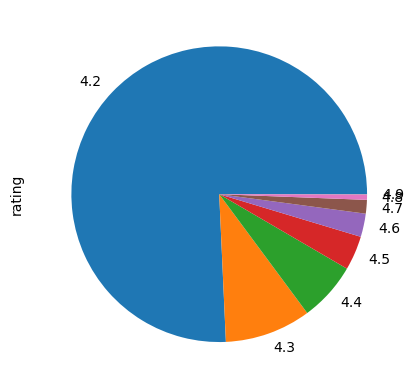

In [21]:
a['rating'].value_counts().plot(kind='pie')

In [22]:
# splitting dataframe a into inputs(x) and output(y)

x=a.drop(['rating'],axis=1)
y=a['rating']
x

,winery,wine,year,num_reviews,country,region,price,type,body,acidity
0,422,759,2013.0,58,0,69,995.00,19,5.0,3.0
1,33,819,2018.0,31,0,74,313.50,18,4.0,2.0
2,447,778,2009.0,1793,0,57,324.95,11,5.0,3.0
3,447,778,1999.0,1705,0,57,692.96,11,5.0,3.0
4,447,778,1996.0,1309,0,57,778.06,11,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7495,159,619,2016.0,392,0,59,19.98,12,4.0,3.0
7496,158,440,2018.0,390,0,53,16.76,9,4.0,3.0
7497,334,302,2017.0,390,0,24,24.45,10,4.0,3.0
7498,316,342,2011.0,389,0,57,64.50,11,5.0,3.0


In [23]:
y

0       4.9
1       4.9
2       4.8
3       4.8
4       4.8
       ... 
7495    4.2
7496    4.2
7497    4.2
7498    4.2
7499    4.2
Name: rating, Length: 7500, dtype: float64

<AxesSubplot:xlabel='year', ylabel='rating'>

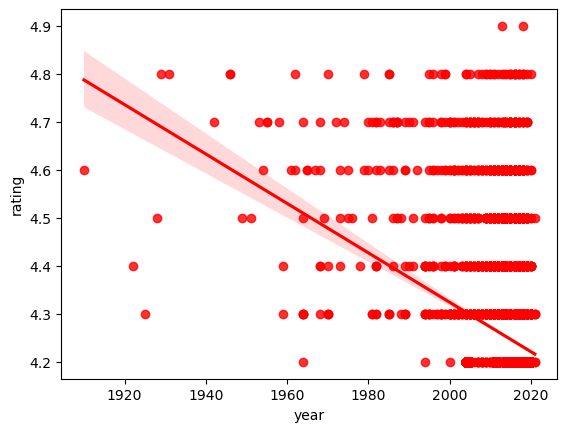

In [24]:
sns.regplot(x=a['year'],y=y,color='red')

<AxesSubplot:xlabel='num_reviews', ylabel='rating'>

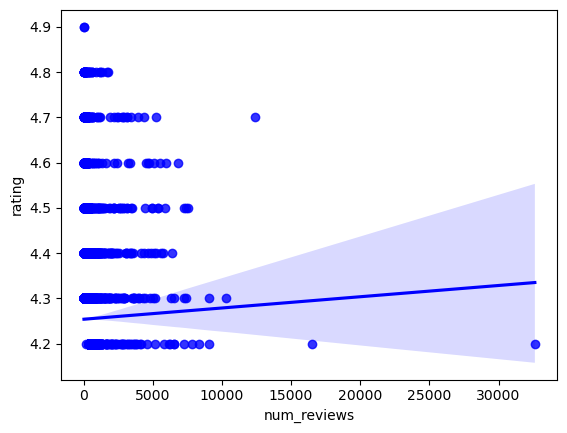

In [25]:
sns.regplot(x=a['num_reviews'],y=y,color='blue')

<AxesSubplot:xlabel='price', ylabel='rating'>

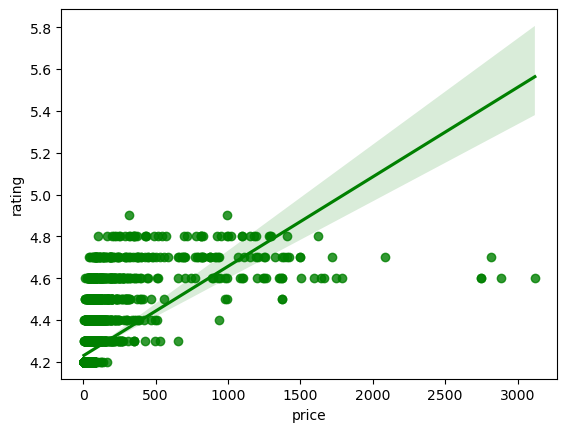

In [26]:
sns.regplot(x=a['price'],y=y,color='green')

<AxesSubplot:xlabel='body', ylabel='rating'>

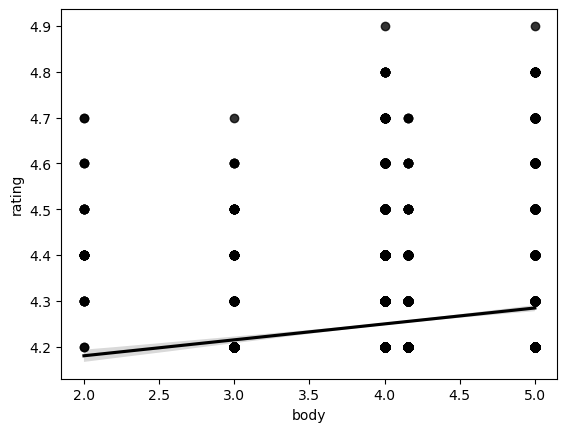

In [27]:
sns.regplot(x=a['body'],y=y,color='black')

<AxesSubplot:xlabel='acidity', ylabel='rating'>

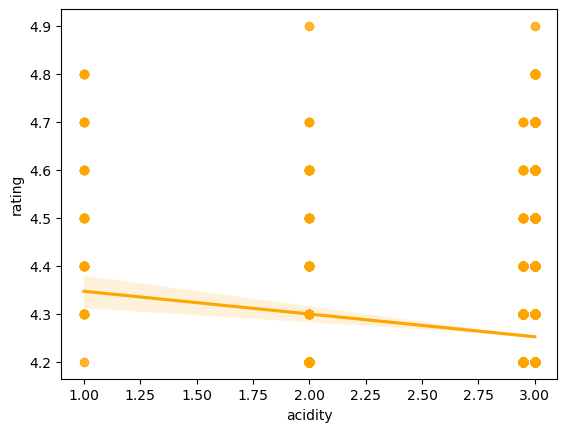

In [28]:
sns.regplot(x=a['acidity'],y=y,color='orange')

In [29]:
# Implementing Train Test Split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,winery,wine,year,num_reviews,country,region,price,type,body,acidity
7179,409,183,2012.0,420,0,59,28.30,12,4.0,3.0
6054,250,669,2004.0,417,0,59,45.00,12,4.0,3.0
7269,159,665,2011.0,395,0,59,61.94,12,4.0,3.0
4866,317,260,2019.0,400,0,69,27.89,19,5.0,3.0
3593,159,665,2011.0,395,0,59,61.94,12,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
5191,317,260,2019.0,400,0,69,27.89,19,5.0,3.0
5226,200,690,2017.0,420,0,2,18.90,10,4.0,3.0
5390,383,496,2011.0,402,0,59,28.53,12,4.0,3.0
860,231,503,2016.0,122,0,59,42.95,13,3.0,3.0


In [30]:
y_train

7179    4.2
6054    4.2
7269    4.2
4866    4.2
3593    4.2
       ... 
5191    4.2
5226    4.2
5390    4.2
860     4.4
7270    4.2
Name: rating, Length: 5250, dtype: float64

PREPROCESSING BY USING STANDARD SCALAR

In [31]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [32]:
# model creation 
# Implementing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,criterion='squared_error')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred

array([4.524, 4.249, 4.405, ..., 4.213, 4.244, 4.274])

PERFORMANCE EVALUATION

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [34]:
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
print('Coefficient of determination (r2_score) is',r2_score(y_test,y_pred))


Mean Absolute Error is 0.04805733333333222
Mean Squared Error is 0.004526671555555443
Mean Absolute Percentage Error is 0.011153564009290651
Root Mean Square Error is 0.06728054366275174
Coefficient of determination (r2_score) is 0.7013652932666936


In [35]:
a1=pd.DataFrame({'Actual Value':y_test,'Predicted Value': y_pred})
a1

,Actual Value,Predicted Value
970,4.4,4.524
6279,4.2,4.249
1859,4.2,4.405
6803,4.2,4.216
6305,4.2,4.277
...,...,...
1773,4.3,4.412
3761,4.2,4.244
1209,4.3,4.213
3936,4.2,4.244


In [36]:
a.corr()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
winery,1.000000,-0.153903,-0.165498,-0.021444,-0.002348,NaN,0.059815,0.015442,-0.122144,0.081634,0.226640
wine,-0.153903,1.000000,0.011481,0.032743,0.085429,NaN,0.163048,0.054004,0.161590,-0.021203,-0.159931
year,-0.165498,0.011481,1.000000,-0.296692,0.024379,NaN,-0.125279,-0.387082,0.131889,-0.095464,0.140499
rating,-0.021444,0.032743,-0.296692,1.000000,0.015229,NaN,0.044441,0.544809,-0.026705,0.157902,-0.091576
num_reviews,-0.002348,0.085429,0.024379,0.015229,1.000000,NaN,0.048799,-0.030083,-0.001946,0.062600,0.037442
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,0.059815,0.163048,-0.125279,0.044441,0.048799,NaN,1.000000,0.080637,0.271435,0.312493,-0.150534
price,0.015442,0.054004,-0.387082,0.544809,-0.030083,NaN,0.080637,1.000000,-0.024484,0.152670,-0.032666
type,-0.122144,0.161590,0.131889,-0.026705,-0.001946,NaN,0.271435,-0.024484,1.000000,0.304882,-0.217330
body,0.081634,-0.021203,-0.095464,0.157902,0.062600,NaN,0.312493,0.152670,0.304882,1.000000,-0.017950


<AxesSubplot:>

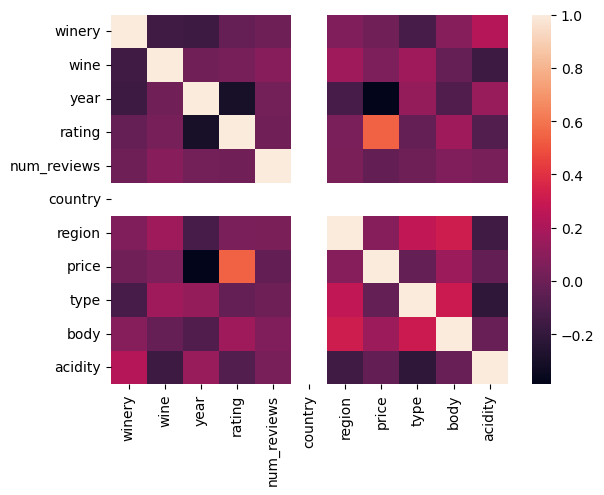

In [37]:
sns.heatmap(a.corr())

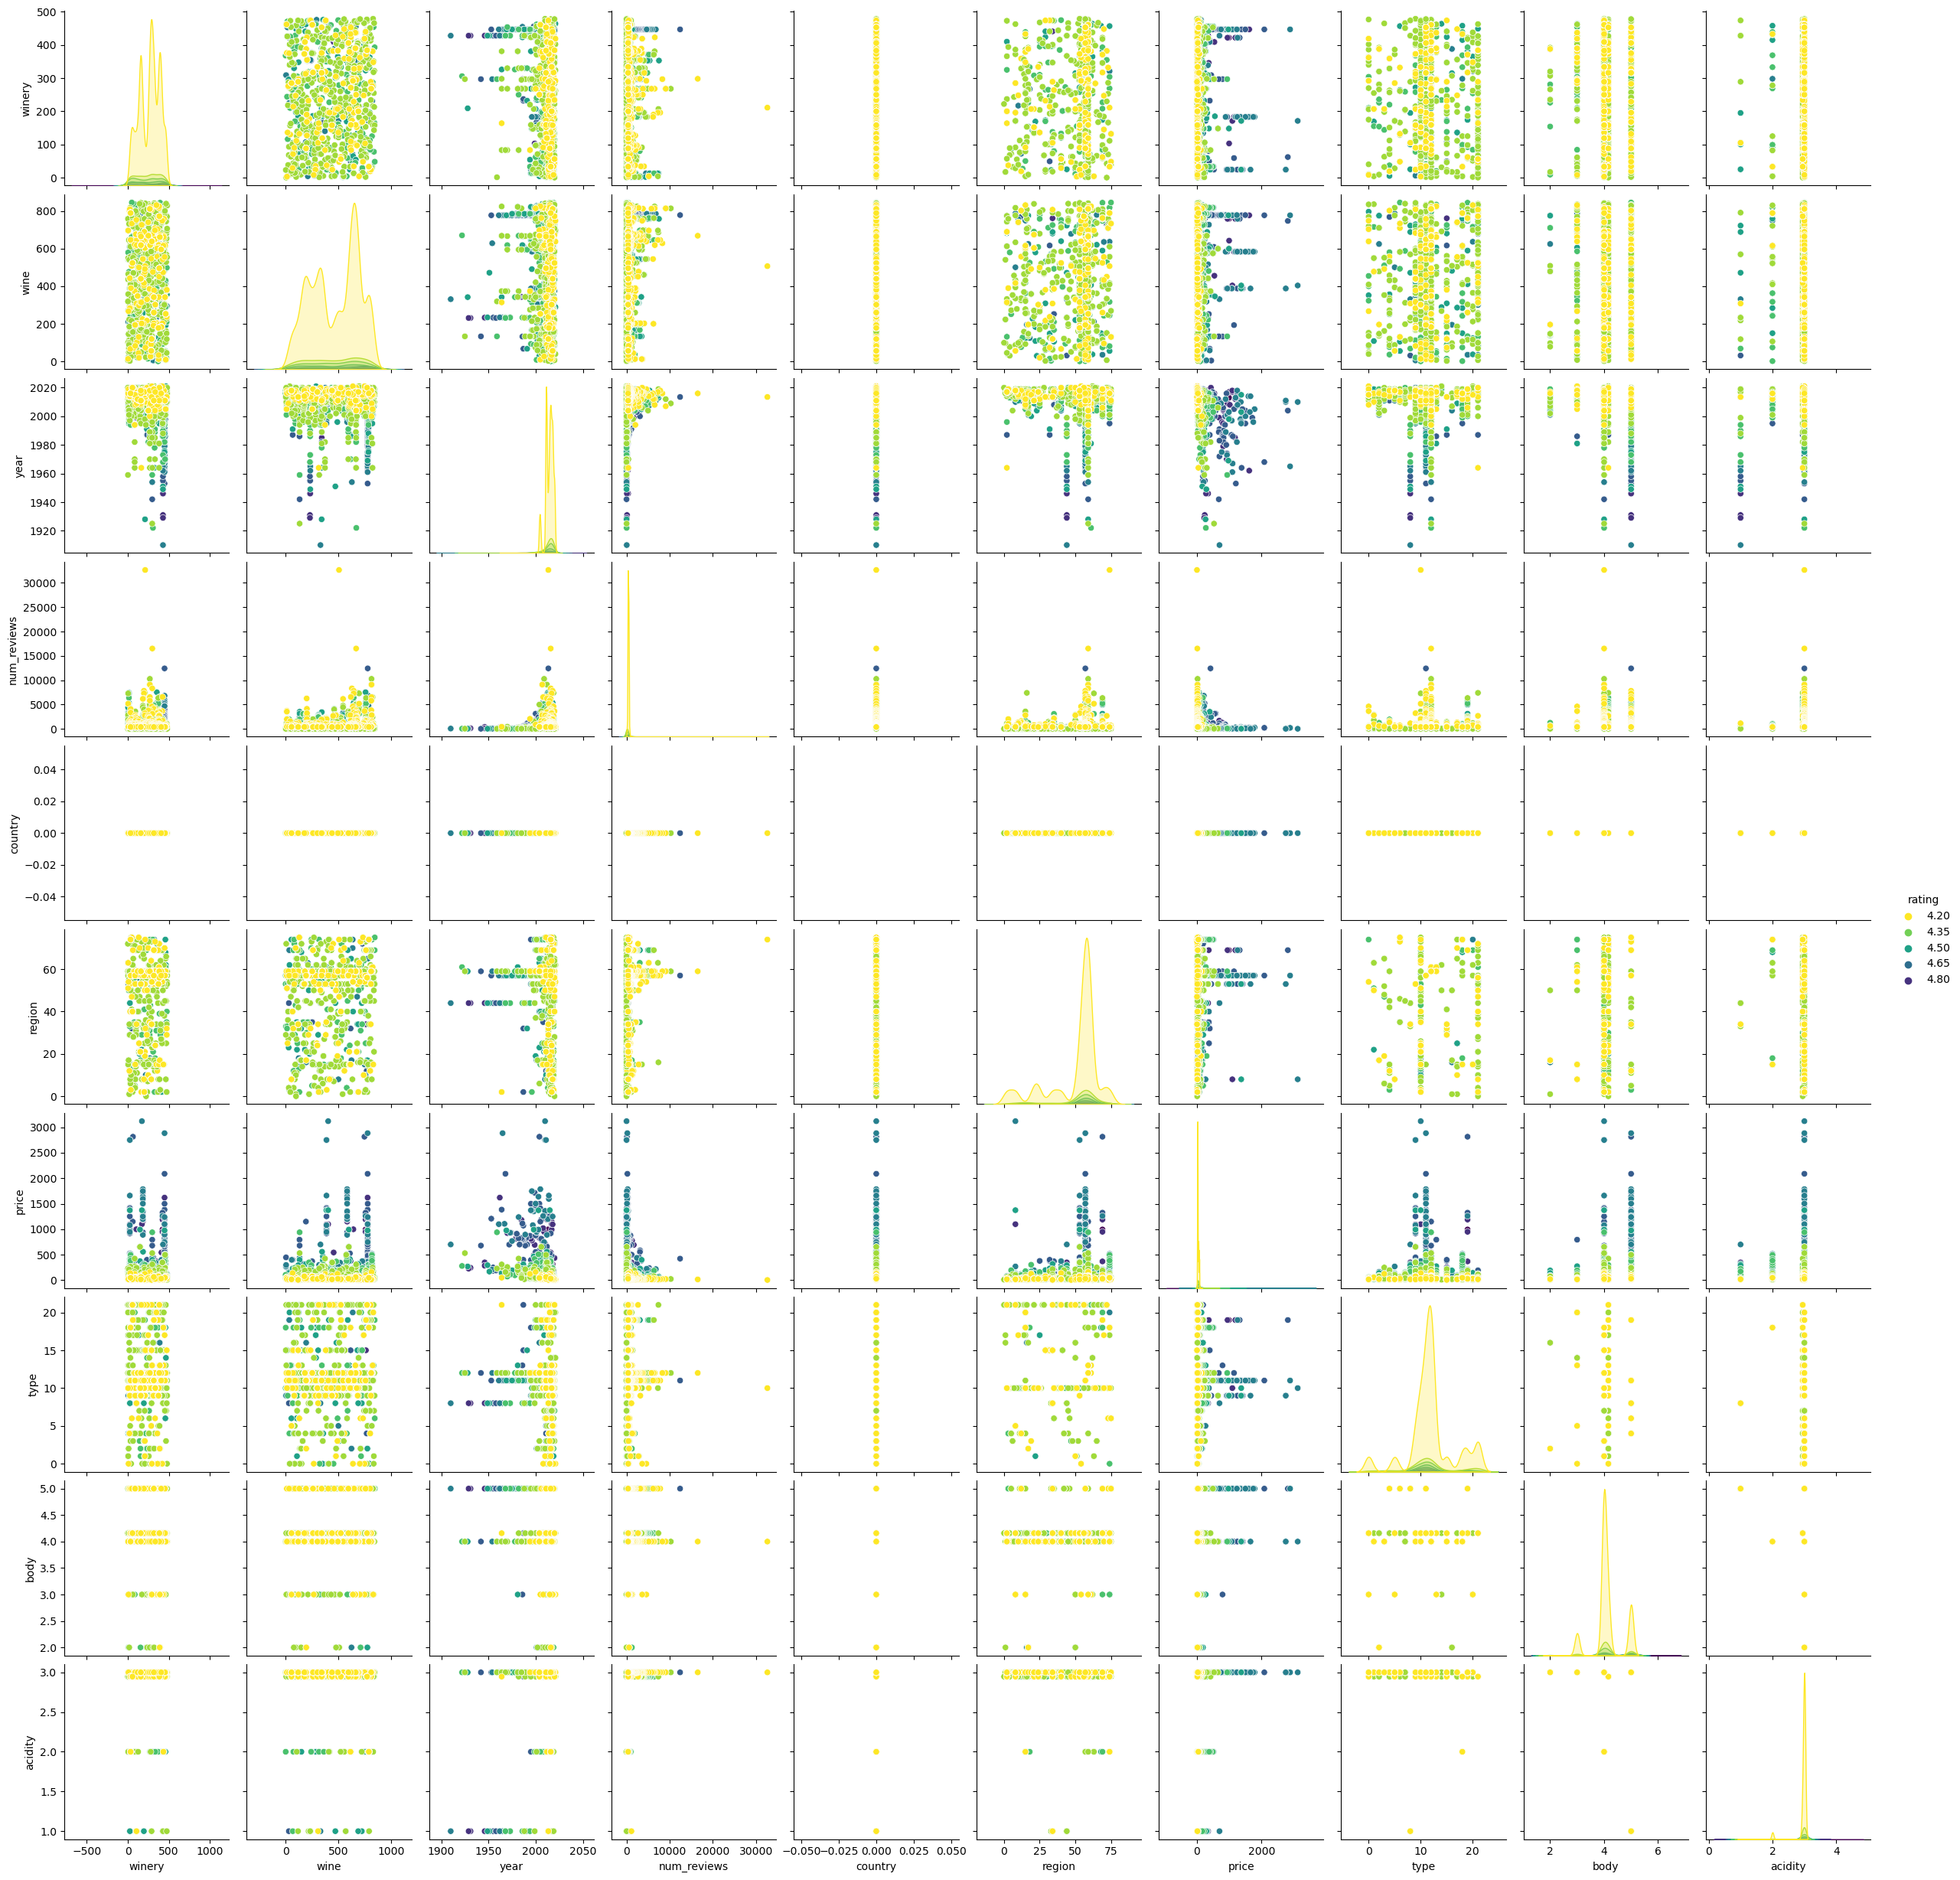

In [38]:
sns.pairplot(a,hue='rating',palette='viridis_r')